In [25]:
# importing libraries
import numpy as np
import pandas as pd
import datetime 
import plotly.express as px
import seaborn as sns
import plotly.graph_objects as go
from scipy import stats
sns.set()
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn import metrics
import pickle
from datetime import datetime
from pickle import dump
import mlflow
import category_encoders as ce
import mlflow
import mlflow.sklearn

import sys
sys.path.insert(0,'../scripts/')
from data_clean import DataClean
from ml_preprocessing import DataPreprocessor
from extraction_utils import DataExtractor
import warnings
warnings.filterwarnings("ignore")

### Data Preprocessing for ML

In [2]:
# loading the datasets
store = pd.read_csv('../data/store.csv')
train = pd.read_csv('../data/train.csv')
test = pd.read_csv('../data/test.csv')

In [3]:
# Merging the training dataset with the store dataset 
train_store=pd.merge(train, store, on='Store', how='inner')
test_store=pd.merge(test, store, on='Store', how='inner')

In [4]:
train_store.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,1,4,2015-07-30,5020,546,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
2,1,3,2015-07-29,4782,523,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,1,2,2015-07-28,5011,560,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
4,1,1,2015-07-27,6102,612,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN


In [5]:
test_store.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,1,4,2015-09-17,1.0,1,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,857,1,3,2015-09-16,1.0,1,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
2,1713,1,2,2015-09-15,1.0,1,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,2569,1,1,2015-09-14,1.0,1,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
4,3425,1,7,2015-09-13,0.0,0,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN


In [6]:
train_store.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1014567 non-null  float64
 12  CompetitionOpenSinceMonth  693861 non-null   float64
 13  CompetitionO

In [7]:
test_store.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41088 entries, 0 to 41087
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Id                         41088 non-null  int64  
 1   Store                      41088 non-null  int64  
 2   DayOfWeek                  41088 non-null  int64  
 3   Date                       41088 non-null  object 
 4   Open                       41077 non-null  float64
 5   Promo                      41088 non-null  int64  
 6   StateHoliday               41088 non-null  object 
 7   SchoolHoliday              41088 non-null  int64  
 8   StoreType                  41088 non-null  object 
 9   Assortment                 41088 non-null  object 
 10  CompetitionDistance        40992 non-null  float64
 11  CompetitionOpenSinceMonth  25872 non-null  float64
 12  CompetitionOpenSinceYear   25872 non-null  float64
 13  Promo2                     41088 non-null  int

In [8]:
train_store['Date'] = pd.to_datetime(train_store['Date'])

In [9]:
clean_train_store = DataClean(train_store)

In [10]:
clean_train_store.dateParser(col='Date')

In [11]:
train_store.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 21 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   DayOfWeek                  1017209 non-null  int64         
 2   Date                       1017209 non-null  datetime64[ns]
 3   Year                       1017209 non-null  int64         
 4   Month                      1017209 non-null  int64         
 5   Day                        1017209 non-null  int64         
 6   Sales                      1017209 non-null  int64         
 7   Customers                  1017209 non-null  int64         
 8   Open                       1017209 non-null  int64         
 9   Promo                      1017209 non-null  int64         
 10  StateHoliday               1017209 non-null  object        
 11  SchoolHoliday              1017209 no

Fixing missing values 

In [12]:
ml_preprocess = DataPreprocessor(train_store)

In [13]:
ml_preprocess.get_column_based_missing_percentage()

,total_missing_values,missing_percentage
Store,0,0.0 %
DayOfWeek,0,0.0 %
Date,0,0.0 %
Year,0,0.0 %
Month,0,0.0 %
Day,0,0.0 %
Sales,0,0.0 %
Customers,0,0.0 %
Open,0,0.0 %
Promo,0,0.0 %


In [14]:
# Filling Missing Values

train_store['CompetitionDistance'].fillna(train_store['CompetitionDistance'].median(), inplace = True)
train_store['CompetitionOpenSinceMonth'].fillna(train_store['CompetitionOpenSinceMonth'].mode().iloc[0], inplace = True)
train_store['CompetitionOpenSinceYear'].fillna(train_store['CompetitionOpenSinceYear'].mode().iloc[0], inplace = True)

train_store['Promo2SinceWeek'].fillna(train_store['Promo2SinceWeek'].mode().iloc[0], inplace=True)
train_store['Promo2SinceYear'].fillna(train_store['Promo2SinceYear'].mode().iloc[0], inplace = True)
train_store['PromoInterval'].fillna(train_store['PromoInterval'].mode().iloc[0], inplace=True)


In [15]:
ml_preprocess.get_column_based_missing_percentage()

,total_missing_values,missing_percentage
Store,0,0.0 %
DayOfWeek,0,0.0 %
Date,0,0.0 %
Year,0,0.0 %
Month,0,0.0 %
Day,0,0.0 %
Sales,0,0.0 %
Customers,0,0.0 %
Open,0,0.0 %
Promo,0,0.0 %


In [16]:
train_store.shape

(1017209, 21)

Fixing outliers

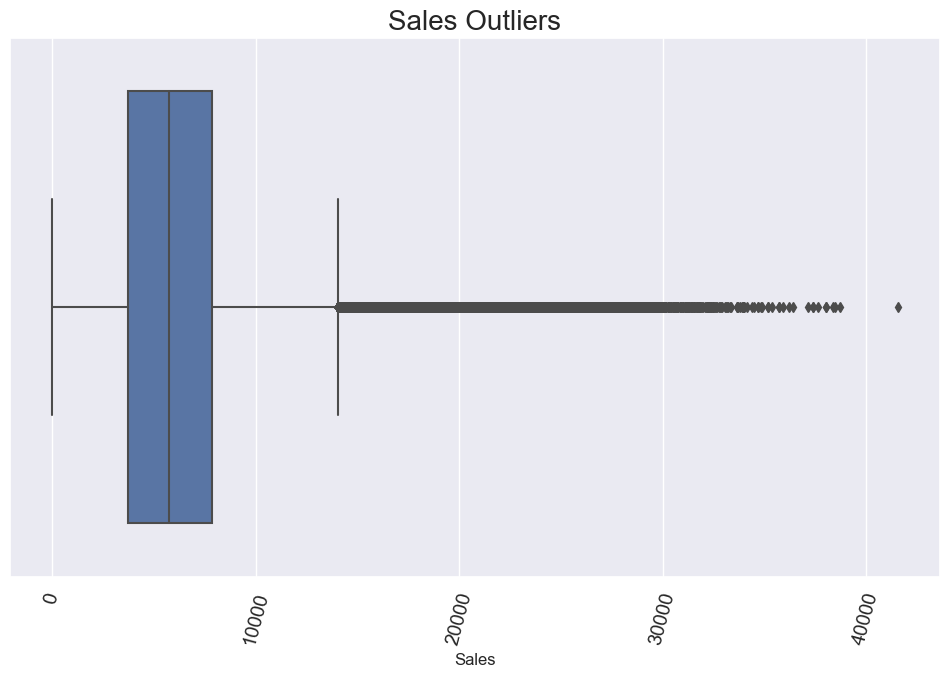

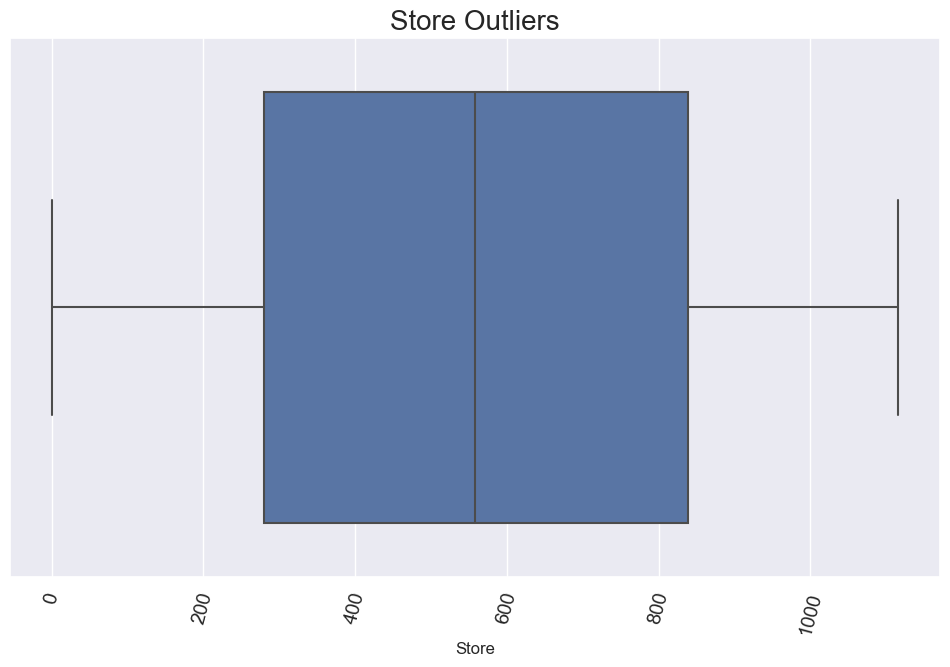

In [21]:
from plots import Plots
PL = Plots()
PL.plot_box(train_store,'Sales','Sales Outliers')
PL.plot_box(train_store,'Store','Store Outliers')

In [22]:
clean_train_store = DataClean(train_store)
clean_train_store.fix_outlier_with_median(train_store, 'Customers')
clean_train_store.fix_outlier_with_median(train_store, 'Sales')

,Store,DayOfWeek,Date,Year,Month,Day,Sales,Customers,Open,Promo,...,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,2015,7,31,5263.0,555.0,1,1,...,1,c,a,1270.0,9.0,2008.0,0,14.0,2011.0,"Jan,Apr,Jul,Oct"
1,1,4,2015-07-30,2015,7,30,5020.0,546.0,1,1,...,1,c,a,1270.0,9.0,2008.0,0,14.0,2011.0,"Jan,Apr,Jul,Oct"
2,1,3,2015-07-29,2015,7,29,4782.0,523.0,1,1,...,1,c,a,1270.0,9.0,2008.0,0,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,1,2,2015-07-28,2015,7,28,5011.0,560.0,1,1,...,1,c,a,1270.0,9.0,2008.0,0,14.0,2011.0,"Jan,Apr,Jul,Oct"
4,1,1,2015-07-27,2015,7,27,6102.0,612.0,1,1,...,1,c,a,1270.0,9.0,2008.0,0,14.0,2011.0,"Jan,Apr,Jul,Oct"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1115,6,2013-01-05,2013,1,5,4771.0,339.0,1,0,...,1,d,c,5350.0,9.0,2013.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
1017205,1115,5,2013-01-04,2013,1,4,4540.0,326.0,1,0,...,1,d,c,5350.0,9.0,2013.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
1017206,1115,4,2013-01-03,2013,1,3,4297.0,300.0,1,0,...,1,d,c,5350.0,9.0,2013.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
1017207,1115,3,2013-01-02,2013,1,2,3697.0,305.0,1,0,...,1,d,c,5350.0,9.0,2013.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec"


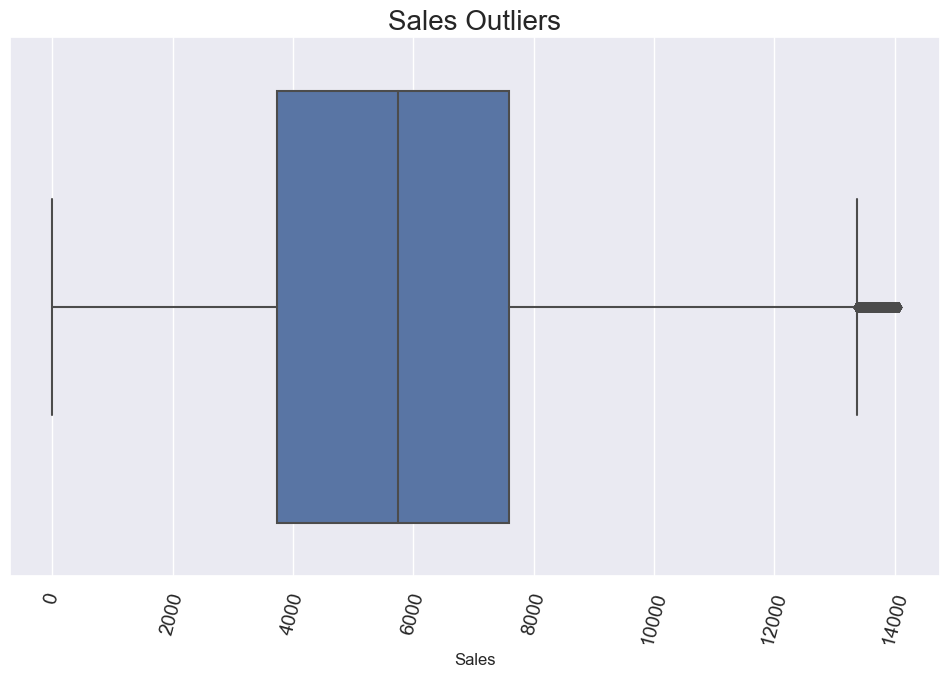

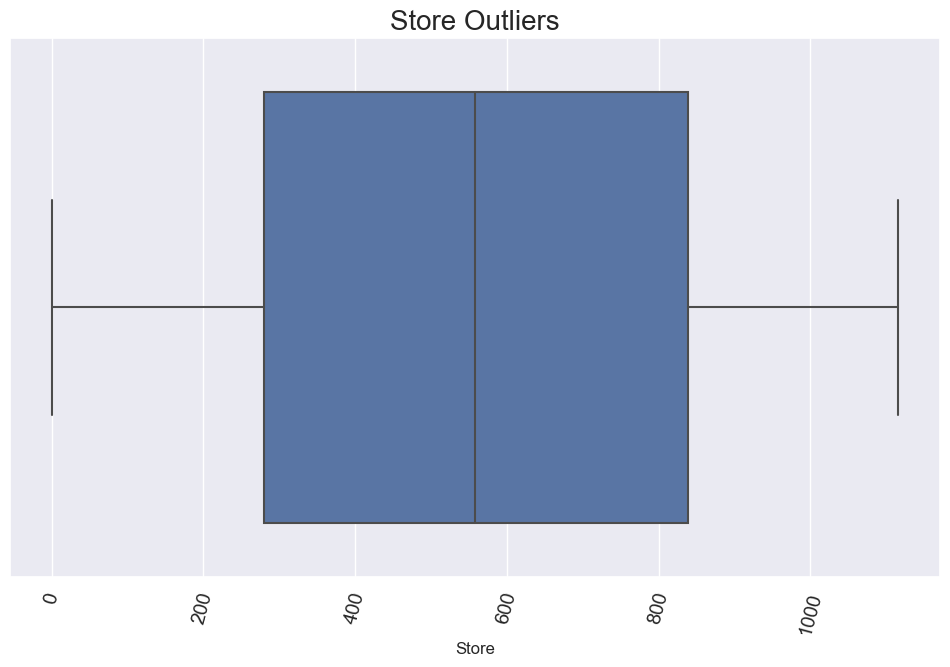

In [23]:
PL.plot_box(train_store,'Sales','Sales Outliers')
PL.plot_box(train_store,'Store','Store Outliers')

* Outliers are fixed!!!

### Feature Extraction

In [26]:
# Generate new features from existing features
extractor = DataExtractor(train_store)
extractor.add_week_day('DayOfWeek')
extractor.add_number_of_days_to_holiday('StateHoliday')
extractor.add_number_of_days_after_holiday('StateHoliday')
extractor.add_month_timing('Day')

In [28]:
extractor.add_season('Month')

In [29]:
# Adding salespercustomer column
train_store['SalesPerCustomer']=train_store['Sales']/train_store['Customers']

In [30]:
# Merging the competitionOpened columns to tell the overall competition 
train_store['CompetitionOpenned'] = np.where((train_store['CompetitionOpenSinceMonth']==0) & (train_store['CompetitionOpenSinceYear']==0) , 0,
                                                  (train_store.Month - train_store.CompetitionOpenSinceMonth) + (12 * (train_store.Year - train_store.CompetitionOpenSinceYear)))

In [31]:
train_store.head()

,Store,DayOfWeek,WeekDay,Date,Year,Month,Season,Day,MonthTiming,Sales,...,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,SalesPerCustomer,CompetitionOpenned
0,1,5,1,2015-07-31,2015,7,Summer,31,3,5263.0,...,a,1270.0,9.0,2008.0,0,14.0,2011.0,"Jan,Apr,Jul,Oct",9.482883,82.0
1,1,4,1,2015-07-30,2015,7,Summer,30,3,5020.0,...,a,1270.0,9.0,2008.0,0,14.0,2011.0,"Jan,Apr,Jul,Oct",9.194139,82.0
2,1,3,1,2015-07-29,2015,7,Summer,29,3,4782.0,...,a,1270.0,9.0,2008.0,0,14.0,2011.0,"Jan,Apr,Jul,Oct",9.143403,82.0
3,1,2,1,2015-07-28,2015,7,Summer,28,3,5011.0,...,a,1270.0,9.0,2008.0,0,14.0,2011.0,"Jan,Apr,Jul,Oct",8.948214,82.0
4,1,1,1,2015-07-27,2015,7,Summer,27,3,6102.0,...,a,1270.0,9.0,2008.0,0,14.0,2011.0,"Jan,Apr,Jul,Oct",9.970588,82.0


In [32]:
# saving the feature extracted data
train_store.to_csv('../data/train_feature_extracted.csv',index=False)

In [33]:
# Labeling object columns
train_store['StateHoliday'] = train_store['StateHoliday'].apply(lambda x: 'o' if x == '0' else x)
train_store['StateHoliday'] = train_store['StateHoliday'].apply(lambda x: 'o' if x == 0 else x)

In [34]:
# Converting catagorical variables with label
extractor.label_columns(['Season', 'StoreType', 'Assortment', 'StateHoliday', 'PromoInterval'])

{'Season': LabelEncoder(),
 'StoreType': LabelEncoder(),
 'Assortment': LabelEncoder(),
 'StateHoliday': LabelEncoder(),
 'PromoInterval': LabelEncoder()}

In [36]:
# Type converting columns
train_store['CompetitionOpenSinceMonth'] = train_store['CompetitionOpenSinceMonth'].astype(int)
train_store['CompetitionOpenSinceYear'] = train_store['CompetitionOpenSinceYear'].astype(int)
train_store['Promo2SinceWeek'] = train_store['Promo2SinceWeek'].astype(int)
train_store['Promo2SinceYear'] = train_store['Promo2SinceYear'].astype(int)
train_store['CompetitionOpenned'] = train_store['CompetitionOpenned'].astype(int)


### Scale the data

In [37]:
train_store.drop(['Store','Date'],axis=1,inplace=True)

In [38]:
# Using StandardScaler to standardize the all columns
scale_list = train_store.columns.to_list()
extractor.standardize_columns(scale_list)

,DayOfWeek,WeekDay,Year,Month,Season,Day,MonthTiming,Sales,Customers,Open,...,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,SalesPerCustomer,CompetitionOpenned
0,0.501484,0.630672,1.502077,0.346724,0.389712,1.740766,1.205894,-0.063134,-0.067027,0.452399,...,-0.940975,-0.538742,0.436247,-0.385752,-1.001128,-0.421904,-0.305054,0.045131,-0.093996,0.595717
1,0.000831,0.630672,1.502077,0.346724,0.389712,1.626969,1.205894,-0.136239,-0.092863,0.452399,...,-0.940975,-0.538742,0.436247,-0.385752,-1.001128,-0.421904,-0.305054,0.045131,-0.207208,0.595717
2,-0.499823,0.630672,1.502077,0.346724,0.389712,1.513173,1.205894,-0.207840,-0.158887,0.452399,...,-0.940975,-0.538742,0.436247,-0.385752,-1.001128,-0.421904,-0.305054,0.045131,-0.227101,0.595717
3,-1.000476,0.630672,1.502077,0.346724,0.389712,1.399377,1.205894,-0.138946,-0.052674,0.452399,...,-0.940975,-0.538742,0.436247,-0.385752,-1.001128,-0.421904,-0.305054,0.045131,-0.303632,0.595717
4,-1.501129,0.630672,1.502077,0.346724,0.389712,1.285581,1.205894,0.189274,0.096598,0.452399,...,-0.940975,-0.538742,0.436247,-0.385752,-1.001128,-0.421904,-0.305054,0.045131,0.097227,0.595717
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1.002138,-1.585611,-1.070616,-1.457193,1.333709,-1.217938,-1.236292,-0.211149,-0.687082,0.452399,...,1.071502,-0.009347,0.436247,0.550445,0.998873,0.305552,0.504512,2.217151,1.706017,-0.790530
1017205,0.501484,0.630672,-1.070616,-1.457193,1.333709,-1.331734,-1.236292,-0.280644,-0.724400,0.452399,...,1.071502,-0.009347,0.436247,0.550445,0.998873,0.305552,0.504512,2.217151,1.648237,-0.790530
1017206,0.000831,0.630672,-1.070616,-1.457193,1.333709,-1.445530,-1.236292,-0.353749,-0.799036,0.452399,...,1.071502,-0.009347,0.436247,0.550445,0.998873,0.305552,0.504512,2.217151,1.803877,-0.790530
1017207,-0.499823,0.630672,-1.070616,-1.457193,1.333709,-1.559327,-1.236292,-0.534255,-0.784683,0.452399,...,1.071502,-0.009347,0.436247,0.550445,0.998873,0.305552,0.504512,2.217151,0.940495,-0.790530


In [39]:
# saving version two of the feature extracted data
train_store.to_csv('../data/train_feature_extracted.csv',index=False)